In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Read crypto_data.csv into Pandas and Set the dataframe
crypto_df = pd.read_csv(Path('crypto_data.csv'))
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [4]:
# Discard all cryptocurrencies that are not being traded. 
# In other words, filter for currencies that are currently being traded. 
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
# Drop the 'IsTrading' column from the dataframe.
crypto_df.drop(['IsTrading'], axis=1, inplace=True)
crypto_df.head()

/Users/paulfeliciano/opt/anaconda3/envs/PythonAdvanced/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
# Remove all rows that have at least one null value.
crypto_df.dropna(how = 'all')

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Filter for cryptocurrencies that have been mined. 
# That is, the total coins mined should be greater than zero.
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


#### The data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.

In [8]:
# Drop the label to create the X data
X = crypto_df.drop('CoinName', axis=1)
X

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


#### The next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, into numerical data. 
#### To accomplish this task, create dummy variables. 

In [9]:
# Creating dummy variables with 'get_dummies'
X_train = pd.get_dummies(X)
print(X_train.columns)
print(X_train)
# Converting output labels to 0 and 1
y_train = LabelEncoder().fit_transform(crypto_df['CoinName'])
y_train
# Examine the number of rows and columns of your dataset now. How did they change?

Index(['TotalCoinsMined', 'Unnamed: 0_1337', 'Unnamed: 0_1CR',
       'Unnamed: 0_404', 'Unnamed: 0_42', 'Unnamed: 0_8BIT', 'Unnamed: 0_AAC',
       'Unnamed: 0_ABJ', 'Unnamed: 0_ABS', 'Unnamed: 0_ABY',
       ...
       'TotalCoinSupply_91388946', 'TotalCoinSupply_92000000000',
       'TotalCoinSupply_9354000', 'TotalCoinSupply_9507271',
       'TotalCoinSupply_9736000', 'TotalCoinSupply_98000000',
       'TotalCoinSupply_98100000000', 'TotalCoinSupply_990000000000',
       'TotalCoinSupply_999481516', 'TotalCoinSupply_9999999'],
      dtype='object', length=909)
      TotalCoinsMined  Unnamed: 0_1337  Unnamed: 0_1CR  Unnamed: 0_404  \
0        4.199995e+01                0               0               0   
2        1.055185e+09                0               0               1   
5        2.927942e+10                1               0               0   
7        1.792718e+07                0               0               0   
8        1.076842e+08                0               0     

array([  4,   3, 159,  55, 171, 284, 123, 310, 172, 515,  72, 135,  64,
       359, 385, 264, 432,  22,  28,  78, 321, 315, 523, 416, 393, 166,
       392, 403, 138,  43,  98, 119,  89, 112,  97, 133, 491, 131, 154,
       149, 155, 164, 177, 186, 189, 182, 212, 206, 210, 227, 231, 242,
       234, 235, 268, 291, 283, 301, 305, 304, 308, 306, 302, 326, 327,
       335, 322, 337, 346, 349, 381, 365, 398, 404, 434, 423, 442, 446,
       447, 453, 458, 460, 463, 451, 476, 483, 485, 479, 474, 494, 492,
       493, 505, 506, 113, 252, 437, 514,  86, 136,  84, 439, 309, 330,
       181, 216, 407, 362, 266, 503, 141, 185,   5, 414,  24, 187, 472,
       481, 121, 342, 499, 213, 120, 300, 430,   2, 250, 333, 298, 115,
        19, 145,  80, 433, 429,  53, 134, 179, 360, 419, 165, 176, 307,
       232, 126, 402, 218, 151, 226, 200, 146,  94, 354,  42, 197,  15,
       426, 513, 420, 175, 521, 443, 413, 328, 188,  79, 396, 401, 102,
       486,  49, 341, 274, 389, 529, 190, 317, 373, 292, 265, 20

In [10]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Perform dimensionality reduction with PCA. 
#### Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired explained variance.

In [11]:
# Initialize PCA model with 90% of components
pca = PCA(n_components=0.9)

# Get two principal components for the data.
X_scaled_pca = pca.fit_transform(X_train_scaled)

In [12]:
# Transform PCA data to a DataFrame
df_scaled_pca = pd.DataFrame(
    data=X_scaled_pca
)
df_scaled_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.306478,-0.134248,-1.546203e-14,-6.253800e-14,0.034075,1.765116,-0.400153,0.105507,-2.213661,-0.508047,...,-5.615045e-18,1.303815e-18,9.719450e-17,1.035458e-17,-5.707831e-17,3.548434e-18,1.286007e-17,2.499091e-17,-4.269215e-19,-4.043281e-17
1,-0.286779,-0.135378,-1.725234e-14,-6.808251e-14,0.029073,1.763942,-0.400047,0.105766,-2.216127,-0.508439,...,-6.821095e-15,1.087180e-15,-2.202897e-15,-2.224076e-15,-2.403077e-15,2.163863e-15,5.062643e-16,-4.455385e-17,1.757464e-16,3.669396e-15
2,0.361159,-0.003304,-2.248935e-15,1.615784e-15,-0.094542,2.909136,-0.481620,-0.442389,-1.633107,0.000252,...,-3.551464e-15,2.499448e-15,-8.846111e-16,-2.845285e-15,-5.865545e-15,-1.059393e-14,3.747905e-15,2.343316e-15,-3.409908e-15,-2.881545e-15
3,-0.287881,-0.256431,-2.904023e-14,-1.236864e-13,0.001154,-1.825765,0.183748,-0.142160,0.426857,0.250633,...,1.034570e+00,-1.412520e+00,-1.582171e+00,-2.496201e+00,-1.688385e+00,-7.676968e-01,1.820754e+00,-7.050725e-01,-2.134093e-01,3.261320e-01
4,-0.136884,-0.256819,-3.727142e-14,-1.322645e-13,-0.049065,-1.761258,0.160765,-0.086250,0.497740,0.093311,...,9.023900e-01,-4.909459e-02,2.268415e+00,-5.406388e-01,3.336804e+00,9.089566e-01,1.912155e+00,-1.142691e+00,2.782308e+00,1.218010e-02


In [13]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.00458275, 0.00441599, 0.00440873, 0.00440873, 0.00439698,
       0.00417911, 0.00399131, 0.00395332, 0.00382562, 0.00363754,
       0.00354395, 0.0034902 , 0.00346206, 0.00340776, 0.00338093,
       0.00330963, 0.00330871, 0.00330655, 0.00330655, 0.00330655,
       0.00330655, 0.00330655, 0.00330655, 0.00330648, 0.00330483,
       0.00328966, 0.00327172, 0.00326623, 0.00321293, 0.00318048,
       0.00316861, 0.00316216, 0.00315996, 0.00314108, 0.00312424,
       0.0031137 , 0.00310847, 0.00310321, 0.00308557, 0.00307458,
       0.00303845, 0.00303296, 0.0030183 , 0.00301373, 0.00300257,
       0.00299494, 0.00299387, 0.00298751, 0.0029855 , 0.00298157,
       0.00296377, 0.00295936, 0.00295555, 0.00293021, 0.00292564,
       0.0028761 , 0.00286206, 0.00283905, 0.00278385, 0.00276602,
       0.00273414, 0.00268138, 0.00267446, 0.00266588, 0.00265738,
       0.00261594, 0.0025889 , 0.00257803, 0.00255124, 0.00253077,
       0.00251547, 0.00241553, 0.0023417 , 0.00224803, 0.00222

In [14]:
# Initialize PCA model with 3 components
pca = PCA(n_components=3)

# Get two principal components for the data.
X_scaled_pca = pca.fit_transform(X_train_scaled)

In [15]:
# Transform PCA data to a DataFrame
df_scaled_pca = pd.DataFrame(
    data=X_scaled_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
df_scaled_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.560141,-0.119963,0.285639
1,-0.497113,-0.142313,0.389756
2,0.217304,0.260155,0.256404
3,-0.114778,-0.211400,-0.286077
4,0.085434,-0.276090,-0.334204


In [16]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.00455826, 0.00438615, 0.0043763 ])

# Perform dimensionality reduction with t-SNE.
#### Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

In [17]:
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)

In [18]:
# Initialize t-SNE model
# Run t-SNE
tsne = TSNE(learning_rate=250)

In [19]:
# Reduce dimensions
tsne_features = tsne.fit_transform(scaled_features)

In [20]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

In [21]:
# The target labels can optionally be used to color the t-SNE plot
labels = y_train

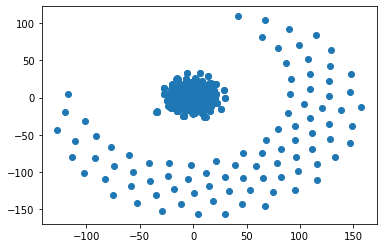

In [22]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

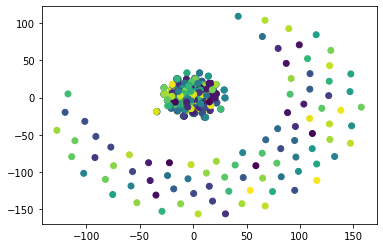

In [23]:
# Results colored by target value
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

# Cluster Analysis with k-Means

#### Finally, create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

In [24]:
# Identify the best number of clusters using the elbow curve
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_scaled_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,6441.732557
1,2,4562.914674
2,3,2946.617025
3,4,1167.610237
4,5,756.264482


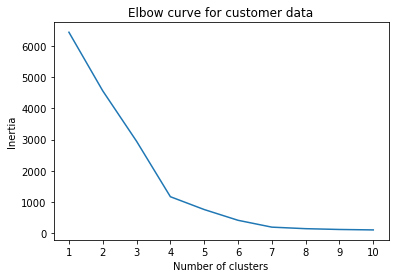

In [25]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [26]:
# Create a function called get_clusters(k, data) that finds the k clusters using K-Means on data.
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [27]:
# Analyzing Clusters with the Best Value of k
clusters = get_clusters(5, df_scaled_pca)
clusters

,principal component 1,principal component 2,principal component 3,class
0,-0.560141,-0.119963,0.285639,0
1,-0.497113,-0.142313,0.389756,0
2,0.217304,0.260155,0.256404,0
3,-0.114778,-0.211400,-0.286077,0
4,0.085434,-0.276090,-0.334204,0
...,...,...,...,...
527,3.081515,0.403911,-0.371575,0
528,-0.448897,-0.180054,0.145532,0
529,0.436736,-0.258623,-0.428851,0
530,-0.168165,-0.193232,-0.336823,0
